<a href="https://colab.research.google.com/github/Jiablero/notebooks/blob/master/stepik_decision_tree_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:30% !important;}</style>"
HTML(style)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:

titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
X = titanic_data.drop(['PassengerId','Survived','Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [0]:
X = pd.get_dummies(X)

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [0]:
X = X.fillna({'Age': X.Age.median()})

In [11]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

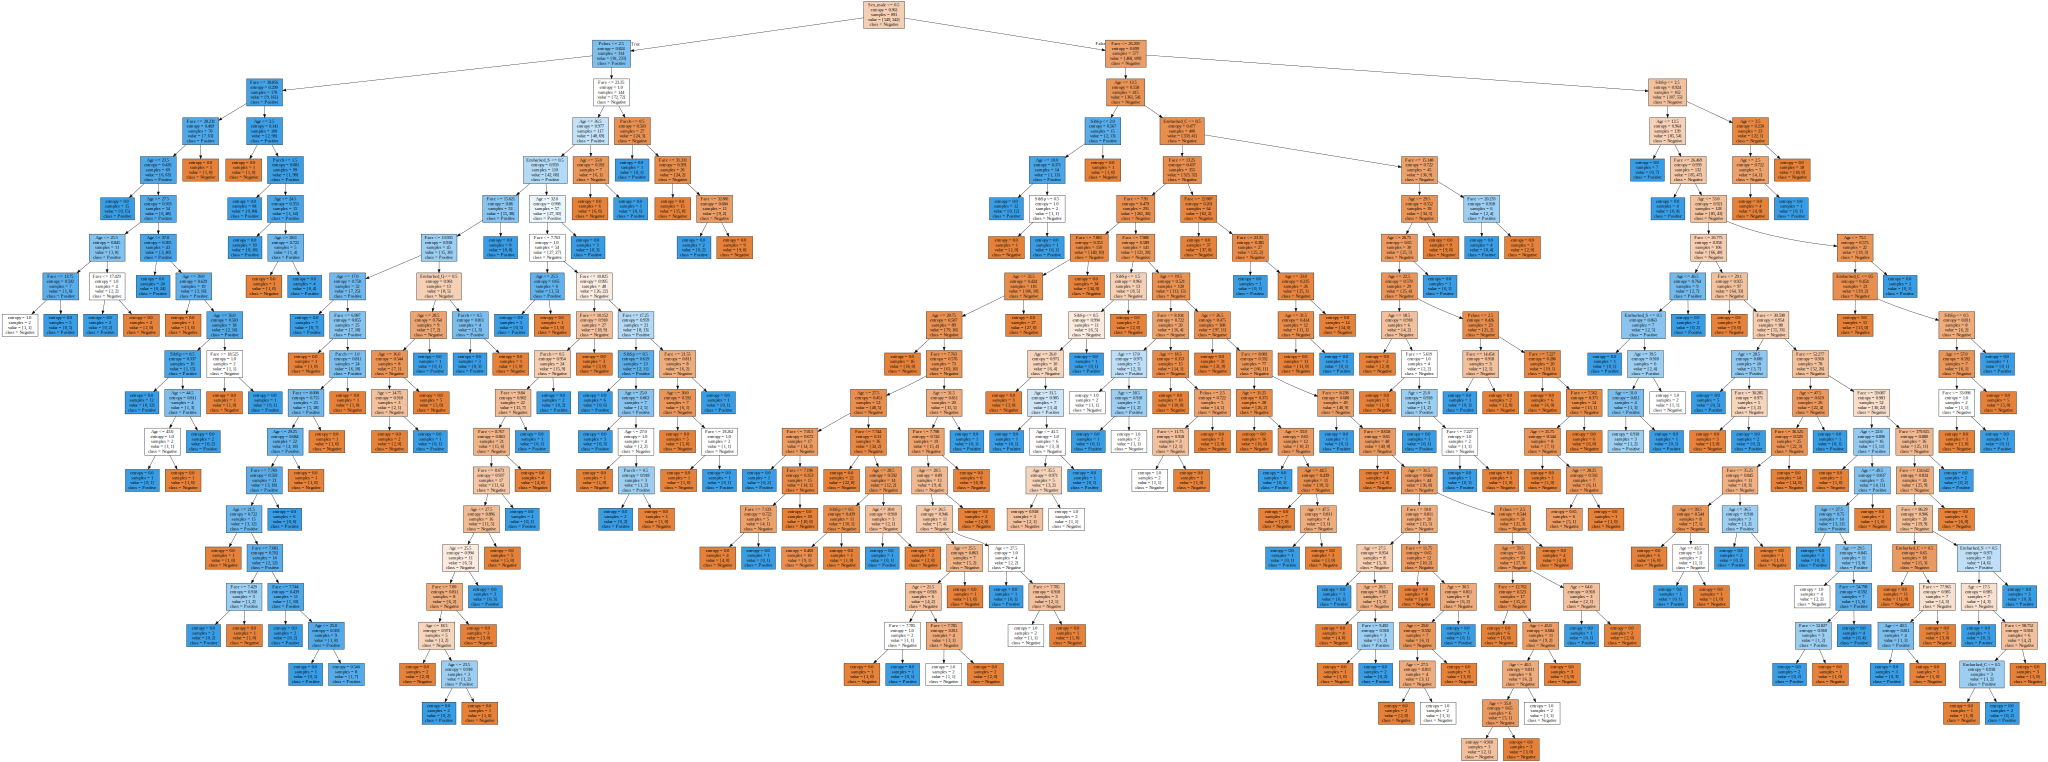

In [14]:
import sklearn
graph = Source(sklearn.tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

#### решение проблемы переобучения - ограничение глубины дерева или использование двух выборок

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape

(596, 10)

In [19]:
X_test.shape

(295, 10)

In [20]:
clf.score(X, y)

0.9797979797979798

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
clf.score(X_train, y_train)

0.9798657718120806

In [23]:
clf.score(X_test, y_test)

0.7661016949152543

большая разница в значениях говорит об overfitting

ограничим глубину дерева:

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
clf.score(X_train, y_train)

0.8238255033557047

In [27]:
clf.score(X_test, y_test)

0.8203389830508474

### эффективный подбор параметров

In [0]:
max_depth_values = range(1, 100)

In [0]:
scores_data = pd.DataFrame()

In [0]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [31]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

In [0]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [33]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


https://stackoverflow.com/questions/51422146/install-the-latest-version-of-seaborn-0-9-0-through-pip

 pip3 install seaborn==0.9.0

In [0]:
import seaborn

In [0]:
seaborn.__version__

'0.10.0'

https://seaborn.pydata.org/generated/seaborn.lineplot.html

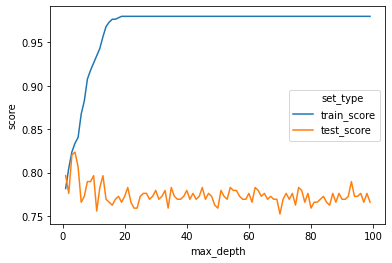

In [35]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

#### анализ графика:
- с увеличеним глубины дерева растет точность классификации на тренировочной выборке
- но это не всегда ведет к нахождению общих закономерностей исследуемых данных
- test score изначально невелик(модель ещ ене доучилась), на промежутке 3-5 score максимален(оптимальное состояние: закономерность с изученных данных переносится на новые), но в дальнейшем с увеличеним train score начинает падать test score(переход от недообученности к переобученности)

https://scikit-learn.org/stable/modules/cross_validation.html

обучение на нескольких подвыборках выборках:

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
cross_val_score(clf, X_train, y_train , cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [39]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7886274509803922

In [0]:
scores_data = pd.DataFrame()

In [0]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [42]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [0]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [44]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


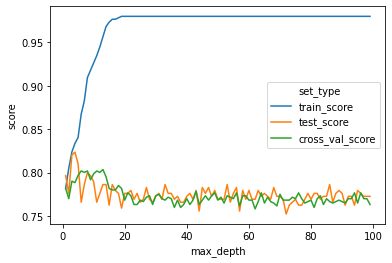

In [45]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

максимальная точность достигается при большей глубине дерева, чем 3-5

cross_val_score более устойчив к переобучению

найдем дерево с максимальным значением cross_val_score

In [0]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

5	cross_val_score	0.800303

In [0]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [49]:
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.7830508474576272

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [0]:
clf = tree.DecisionTreeClassifier()

In [0]:
grid_search_cv_cld = GridSearchCV(clf, parameters, cv = 5)

In [61]:
grid_search_cv_cld.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [62]:
grid_search_cv_cld.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [0]:
best_clf = grid_search_cv_cld.best_estimator_

In [65]:
best_clf.score(X_test, y_test)

0.7661016949152543

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [69]:
precision_score(y_test, best_clf.predict(X_test) ,average='macro')

0.7739555702917772

In [72]:
recall_score(y_test, best_clf.predict(X_test) ,average='macro')

0.7360714285714285

In [0]:
y_predicted_prob = best_clf.predict_proba(X_test)

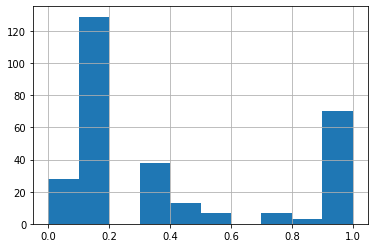

In [0]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [0]:
import numpy as np

In [0]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [97]:
precision_score(y_test, y_pred ,average='macro')

0.7940269036159446

In [98]:
recall_score(y_test, y_pred ,average='macro')

0.7269047619047619

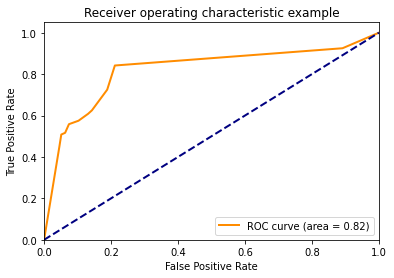

In [102]:
from sklearn.metrics import roc_curve, auc
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()